In [1]:
!pip install numpy
!pip install pandas
import numpy as np 
import pandas as pd


In [2]:
df=pd.read_csv('HACKATHON_TRAINING_DATA.CSV')
df.head()
df.shape

(327741, 139)

In [3]:
!pip install seaborn
!pip install matpllotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matpllotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matpllotlib.pyplot


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

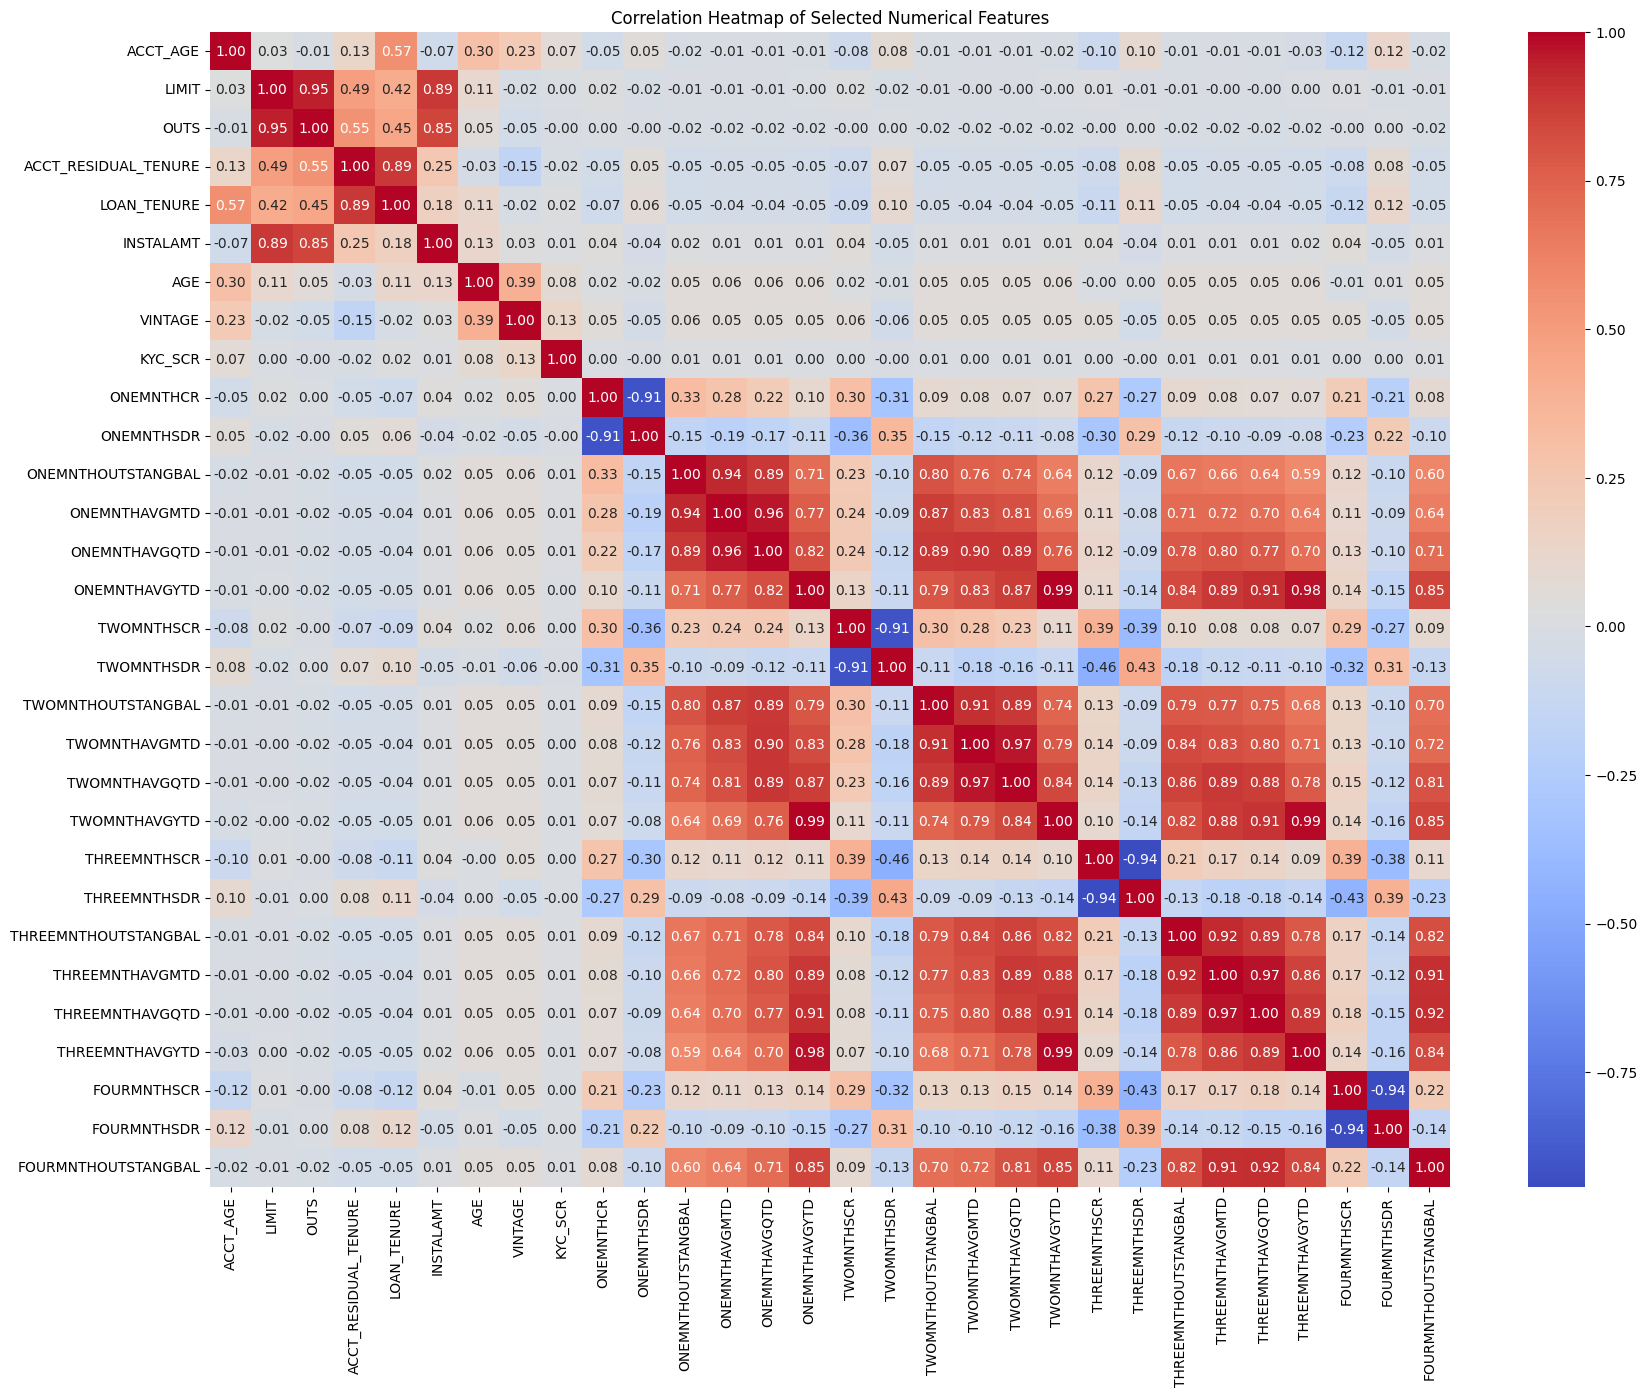

In [5]:
num_cols = df.select_dtypes(include=['number']).columns[:30]

# Calculate correlation matrix
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

In [6]:
object_cols = list(df.select_dtypes(include='object').columns)
object_cols

['SI_FLG',
 'LOCKER_HLDR_IND',
 'UID_FLG',
 'KYC_FLG',
 'INB_FLG',
 'EKYC_FLG',
 'AVERAGE_ACCT_AGE1',
 'CREDIT_HISTORY_LENGTH1',
 'INCOME_BAND1',
 'AGREG_GROUP',
 'PRODUCT_TYPE',
 'TIME_PERIOD']

In [7]:
df.isnull().sum().sort_values(ascending=False)

LAST_1_YR_RG4           303363
LAST_3_YR_RG4           267761
CUST_NO_OF_TIMES_NPA    215669
FIRST_NPA_TENURE        215669
LATEST_NPA_TENURE       215669
                         ...  
PRODUCT_TYPE                 0
LATEST_DR_DAYS               0
TIME_PERIOD                  0
TARGET                       0
UNIQUE_ID                    0
Length: 139, dtype: int64

In [8]:
missing_threshold = 0.5 * len(df)
df = df.dropna(thresh=missing_threshold, axis=1)

In [9]:
df.shape

(327741, 132)

In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [11]:
# Get all categorical column names
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values with mode for each categorical column
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [12]:
columns_to_drop = ['SI_FLG', 'AGREG_GROUP', 'TIME_PERIOD']
df = df.drop(columns=columns_to_drop, errors='ignore')



In [13]:
extracted = df['AVERAGE_ACCT_AGE1'].str.extract(r'(\d+)yrs\s+(\d+)mon')

# Convert to numeric
extracted = extracted.apply(pd.to_numeric)

# Calculate total months
df['AVERAGE_ACCT_AGE1_MONTHS'] = extracted[0] * 12 + extracted[1]

extracted = df['CREDIT_HISTORY_LENGTH1'].str.extract(r'(\d+)yrs\s+(\d+)mon')

# Convert to numeric
extracted = extracted.apply(pd.to_numeric)

# Calculate total months
df['CREDIT_HISTORY_LENGTH1_MONTHS'] = extracted[0] * 12 + extracted[1]

columns_to_drop = ['AVERAGE_ACCT_AGE1', 'CREDIT_HISTORY_LENGTH1']
df = df.drop(columns=columns_to_drop, errors='ignore')



C:\Users\udans\AppData\Local\Temp\ipykernel_13916\2689535639.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['AVERAGE_ACCT_AGE1_MONTHS'] = extracted[0] * 12 + extracted[1]
C:\Users\udans\AppData\Local\Temp\ipykernel_13916\2689535639.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['CREDIT_HISTORY_LENGTH1_MONTHS'] = extracted[0] * 12 + extracted[1]


In [15]:
# Columns to average
cols_to_average1 = ['ONEMNTHOUTSTANGBAL', 'ONEMNTHAVGMTD', 'ONEMNTHAVGQTD', 'ONEMNTHAVGYTD']

# Calculate the average row-wise, ignoring NaN values
df['ONEMNTH_AVG'] = df[cols_to_average1].mean(axis=1)
df=df.drop(columns=cols_to_average1,errors='ignore')



# Columns to average
cols_to_average2 = ['TWOMNTHOUTSTANGBAL', 'TWOMNTHAVGMTD', 'TWOMNTHAVGQTD', 'TWOMNTHAVGYTD']

# Calculate the average row-wise, ignoring NaN values
df['TWOMNTH_AVG'] = df[cols_to_average2].mean(axis=1)
df=df.drop(columns=cols_to_average2,errors='ignore')





# Columns to average
cols_to_average3 = ['THREEMNTHOUTSTANGBAL', 'THREEMNTHAVGMTD', 'THREEMNTHAVGQTD', 'THREEMNTHAVGYTD']

# Calculate the average row-wise, ignoring NaN values
df['THREEMNTH_AVG'] = df[cols_to_average3].mean(axis=1)
df=df.drop(columns=cols_to_average3,errors='ignore')





C:\Users\udans\AppData\Local\Temp\ipykernel_13916\3281469209.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TWOMNTH_AVG'] = df[cols_to_average2].mean(axis=1)
C:\Users\udans\AppData\Local\Temp\ipykernel_13916\3281469209.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['THREEMNTH_AVG'] = df[cols_to_average3].mean(axis=1)


In [16]:
cols_to_averageCR = ['CRIFF_11', 'CRIFF_22', 'CRIFF_33', 'CRIFF_44','CRIFF_55','CRIFF_66']
df['CRIFF_AVG'] = df[cols_to_averageCR].mean(axis=1)
df=df.drop(columns=cols_to_averageCR,errors='ignore')

C:\Users\udans\AppData\Local\Temp\ipykernel_13916\4060333312.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['CRIFF_AVG'] = df[cols_to_averageCR].mean(axis=1)


In [17]:
df.shape

(327741, 115)

In [18]:
X = df.drop(columns=['TARGET'],axis=1)
X.shape

(327741, 114)

In [19]:
Y = df['TARGET']

In [20]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

!pip install scikit-learn
  
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [21]:
X = preprocessor.fit_transform(X)
X.shape

(327741, 135)

In [22]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.09225535,
        -0.10044371, -0.27335715],
       [ 1.        ,  0.        ,  0.        , ..., -0.57823111,
        -0.10044371, -0.12628761],
       [ 1.        ,  0.        ,  0.        , ..., -0.09225535,
        -0.10044371, -0.2044183 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.06053027,
        -0.04542879, -0.36297764],
       [ 1.        ,  0.        ,  0.        , ..., -0.08337502,
        -0.09420091,  1.1123136 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.0994364 ,
        -0.11242885,  0.02078192]], shape=(327741, 135))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)



In [37]:
# Update 1: Replace Regressors with Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC  # Changed from SVR
from sklearn.linear_model import LogisticRegression  # Main classification linear model
from sklearn.linear_model import RidgeClassifier  # Alternative linear classifiers
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Keep these metrics for classification
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
def evaluate_model(y_true, y_pred, y_proba=None):
    """Evaluates binary classification performance"""
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'Confusion Matrix': confusion_matrix(y_true, y_pred)
    }
    
    if y_proba is not None:  # Only calculate if probabilities are available
        metrics['AUC-ROC'] = roc_auc_score(y_true, y_proba)
    
    print(classification_report(y_true, y_pred))
    return metrics

In [41]:

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "SVC": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, Y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC if needed
    
    # Calculate metrics
    train_acc = accuracy_score(Y_train, y_train_pred)
    test_acc = accuracy_score(Y_test, y_test_pred)
    test_precision = precision_score(Y_test, y_test_pred)
    test_recall = recall_score(Y_test, y_test_pred)
    test_f1 = f1_score(Y_test, y_test_pred)
    
    # Store results
    model_list.append(model_name)
    accuracy_list.append(test_acc)
    precision_list.append(test_precision)
    recall_list.append(test_recall)
    f1_list.append(test_f1)
    
    # Print results
    print(f"\n{model_name}")
    print("======================================")
    print("Training Performance:")
    print(f"- Accuracy: {train_acc:.4f}")
    
    print("\nTest Performance:")
    print(f"- Accuracy: {test_acc:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_test_pred))
    print("======================================\n")

c:\Users\udans\OneDrive\Desktop\psb\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Training Performance:
- Accuracy: 0.8942

Test Performance:
- Accuracy: 0.8947
- Precision: 0.5902
- Recall: 0.0668
- F1 Score: 0.1201

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     58503
           1       0.59      0.07      0.12      7046

    accuracy                           0.89     65549
   macro avg       0.74      0.53      0.53     65549
weighted avg       0.87      0.89      0.86     65549



K-Neighbors Classifier
Training Performance:
- Accuracy: 0.9080

Test Performance:
- Accuracy: 0.8896
- Precision: 0.4565
- Recall: 0.1436
- F1 Score: 0.2185

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     58503
           1       0.46      0.14      0.22      7046

    accuracy                           0.89     65549
   macro avg       0.68      0.56      0.58     65549
weighted avg       0.86      0.89    